In [ ]:
#-------------------Clustering---------------!

In [19]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [21]:
# Load the dataset
data = pd.read_excel("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\Clustering\\EastWestAirlines.xlsx",sheet_name="data")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [23]:
# Data Preprocessing
# Handle missing values (if any)
data = data.dropna()

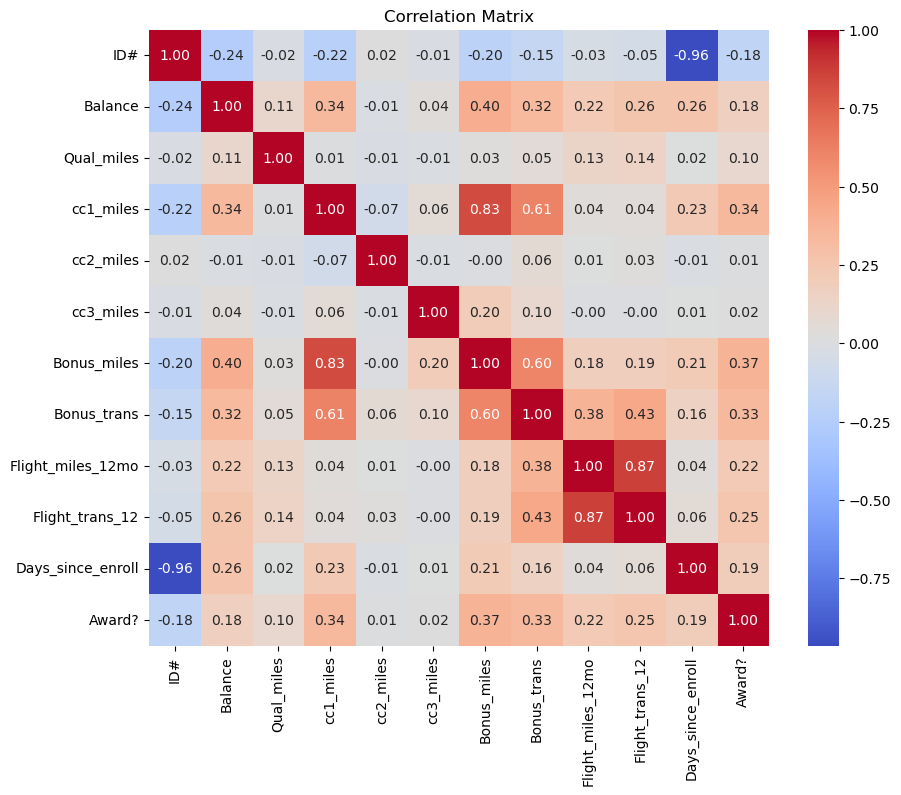

In [25]:
# Correlation matrix for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])

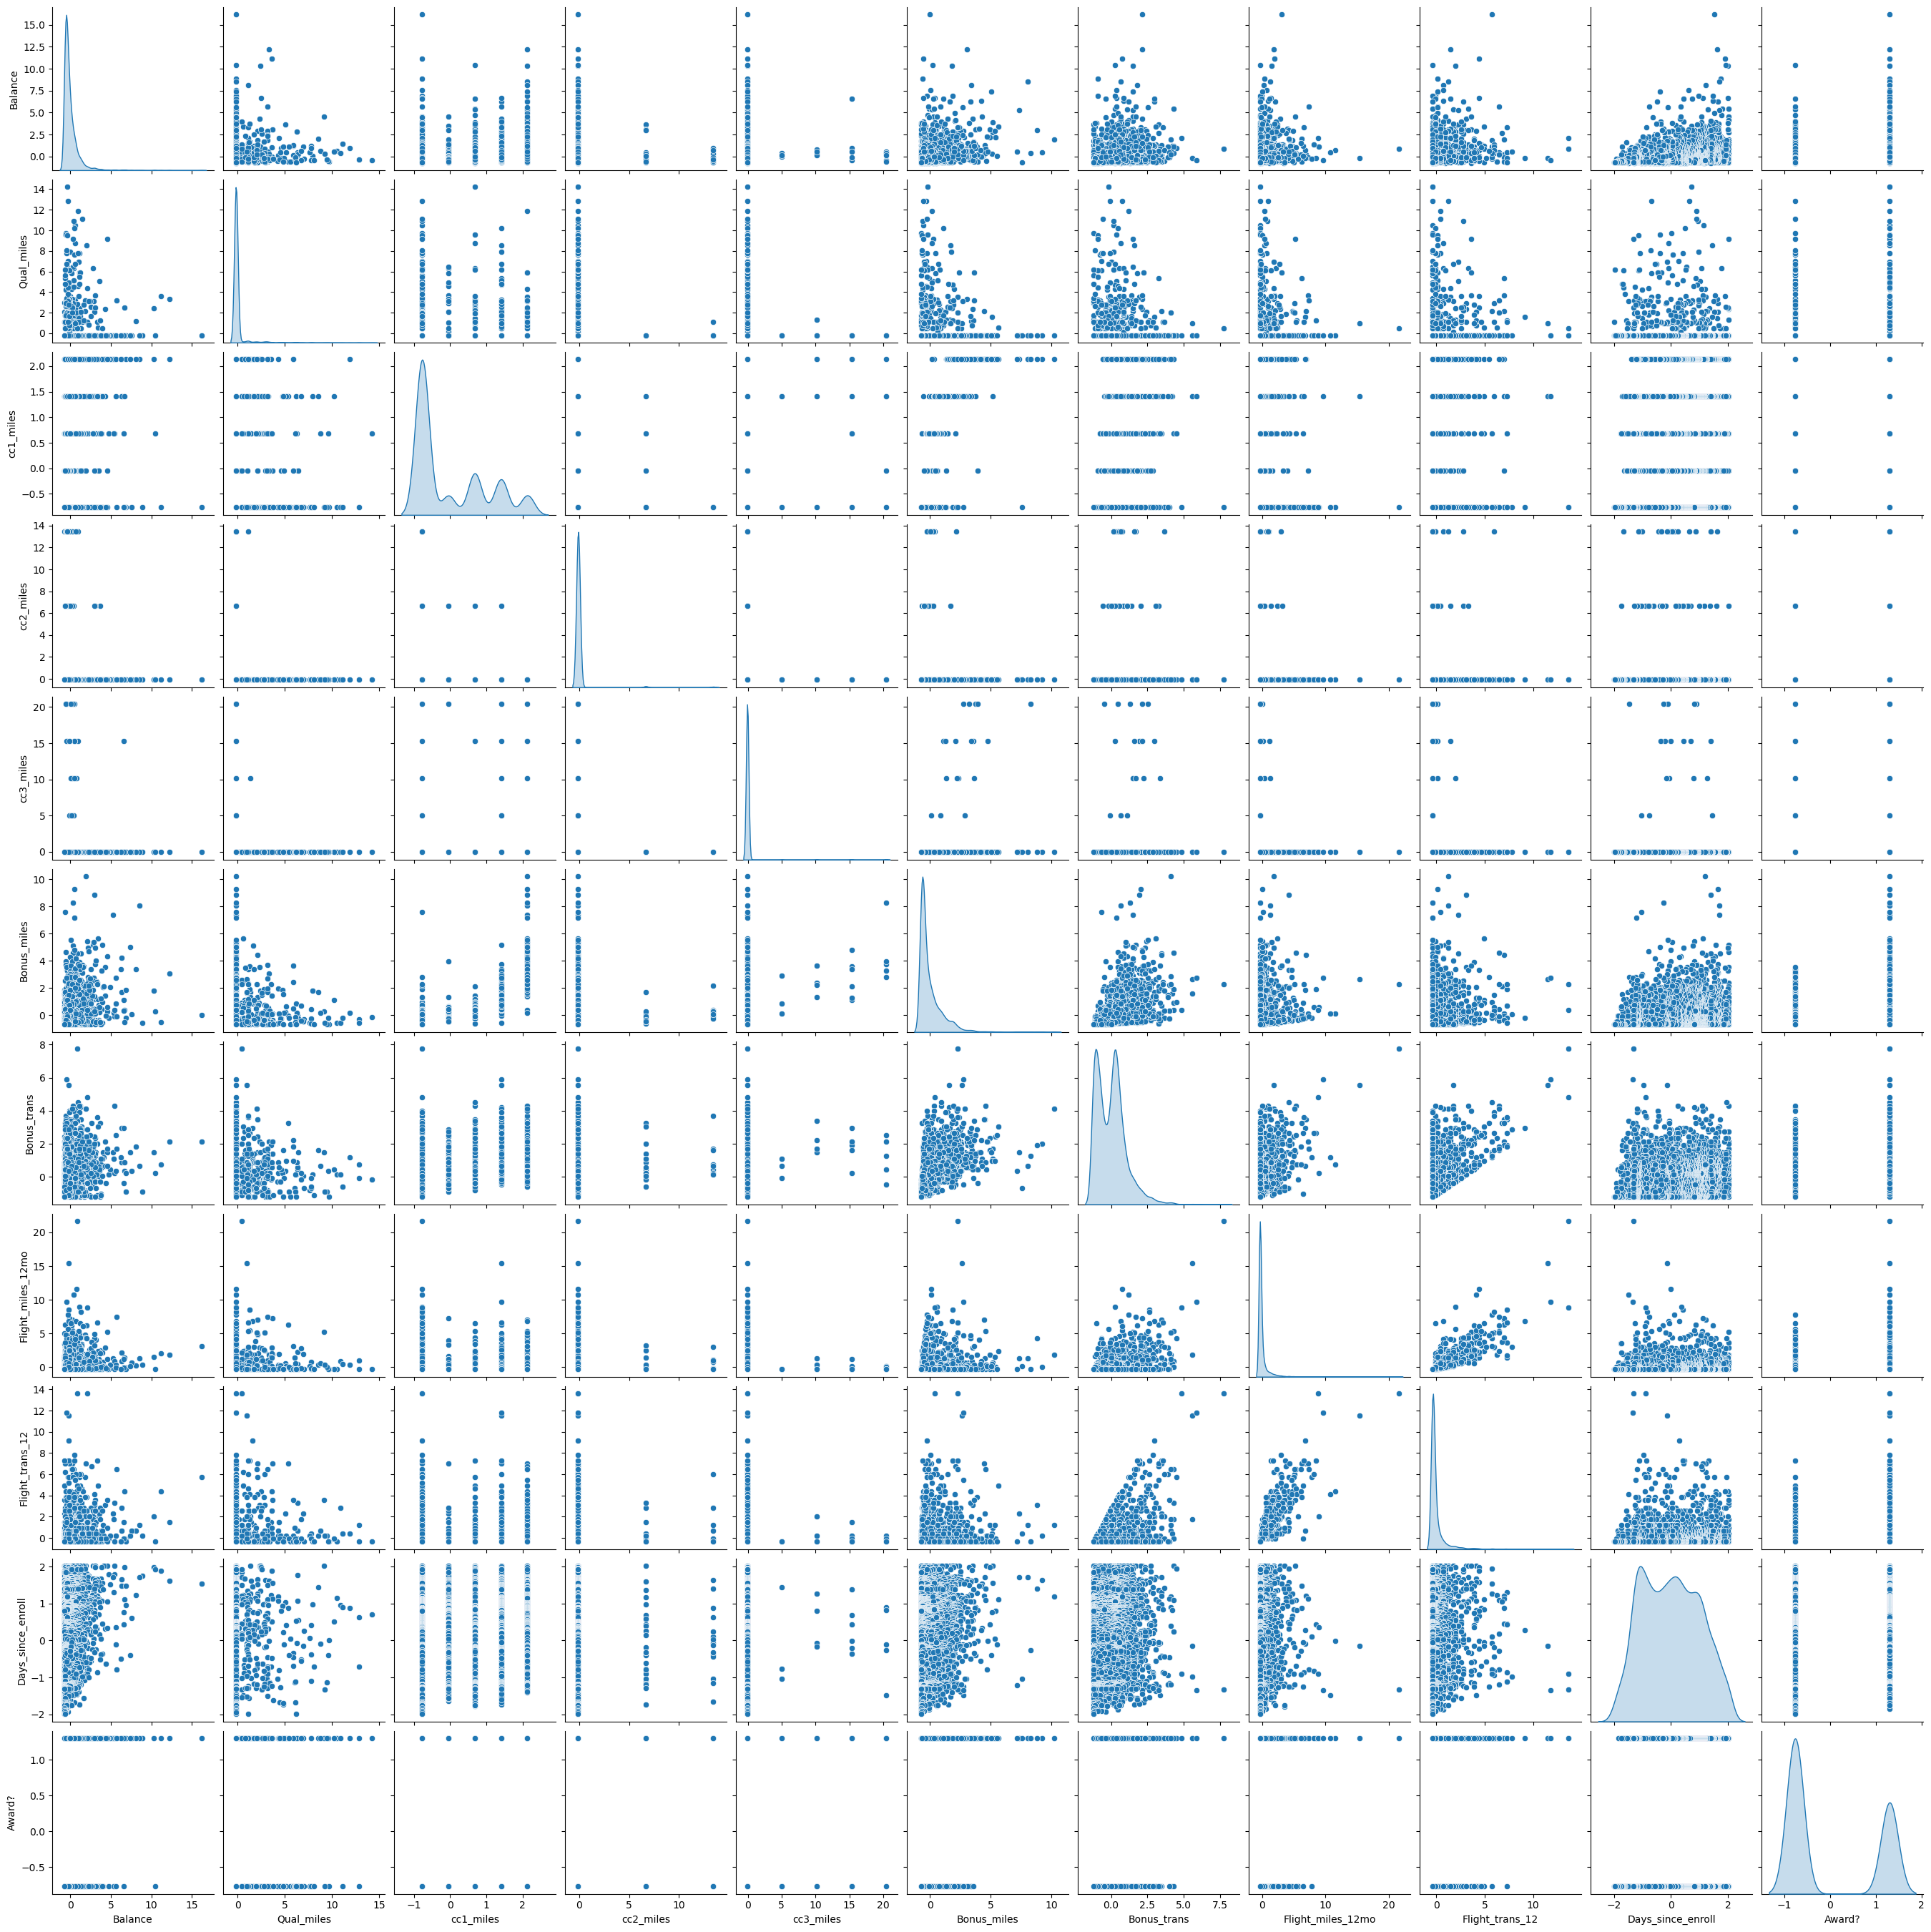

In [173]:
#Exploratory Data Analysis (EDA)
sns.pairplot(pd.DataFrame(data_scaled, columns=data.columns[1:]), diag_kind='kde')
plt.show()

In [29]:
# KMeans Clustering to identify potential clusters

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

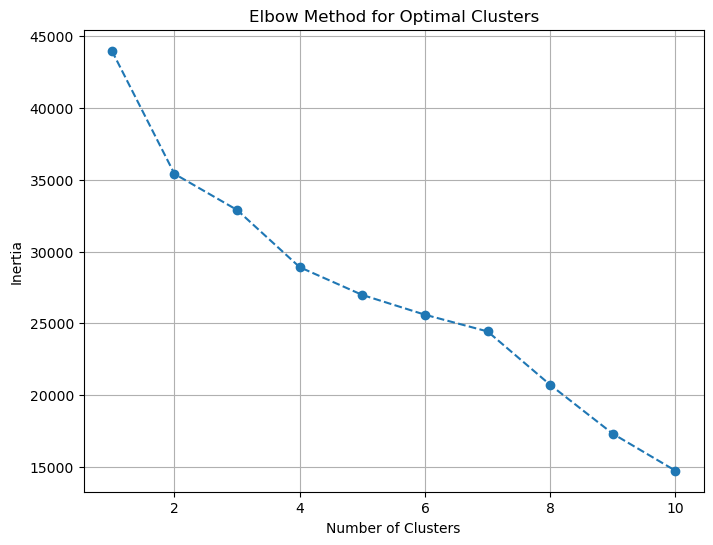

In [31]:
# Elbow Method plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

In [33]:
# Fit K-Means with optimal K
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [35]:
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.19071186813310886


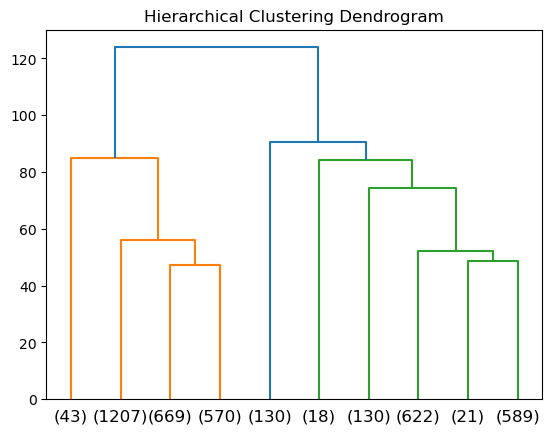

In [37]:
#Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [39]:
# Apply Hierarchical Clustering
hc_labels = fcluster(linked, t=4, criterion='maxclust') 

In [41]:
#DBSCAN
# Experiment with epsilon (eps) and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form multiple clusters.")

DBSCAN Silhouette Score: -0.07834757831741163


Text(0.5, 1.0, 'K-Means Clustering')

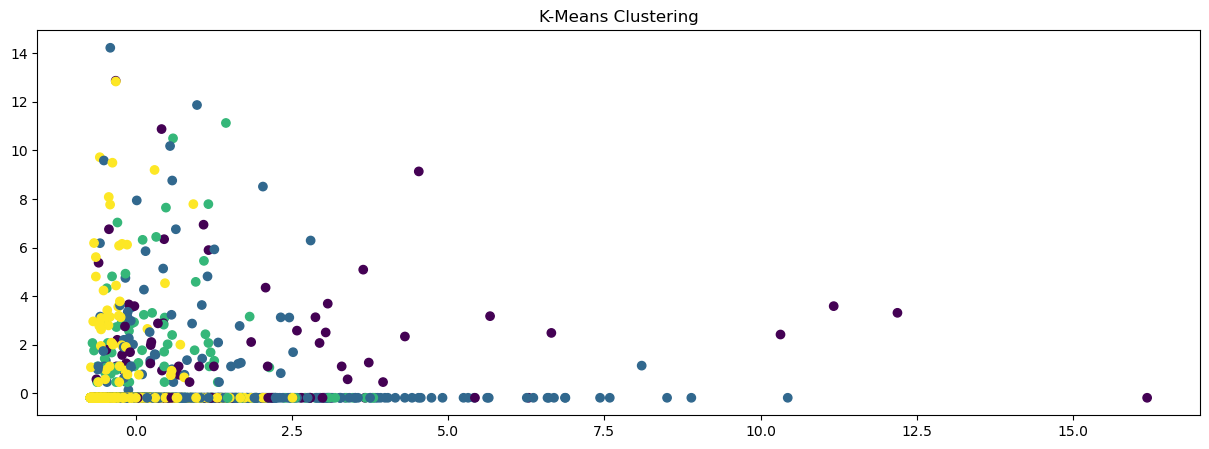

In [43]:
#Visualizations

plt.figure(figsize=(15, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")

Text(0.5, 1.0, 'Hierarchical Clustering')

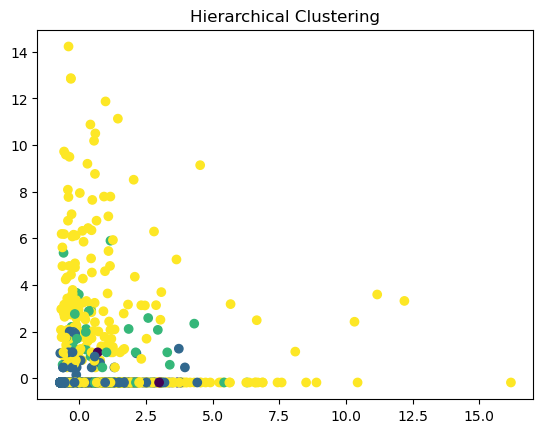

In [45]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hc_labels, cmap='viridis')
plt.title("Hierarchical Clustering")

Text(0.5, 1.0, 'DBSCAN Clustering')

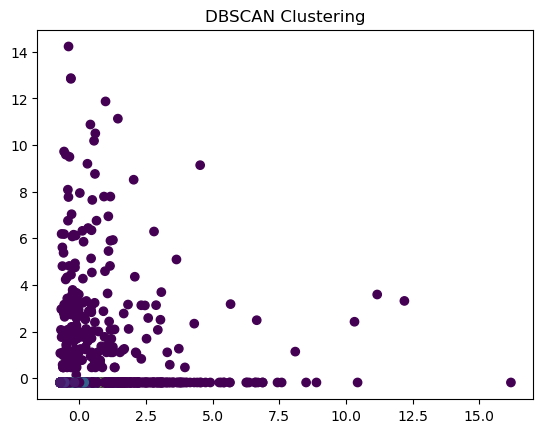

In [47]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")


In [49]:
# Cluster Analysis
print("Cluster Characteristics (K-Means):")
for i in range(optimal_k):
    print(f"Cluster {i}: {data.iloc[kmeans_labels == i].mean()}")

Cluster Characteristics (K-Means):
Cluster 0: ID#                    1750.333333
Balance              193291.147436
Qual_miles              795.455128
cc1_miles                 2.179487
cc2_miles                 1.038462
cc3_miles                 1.000000
Bonus_miles           32292.288462
Bonus_trans              27.628205
Flight_miles_12mo      5530.230769
Flight_trans_12          16.211538
Days_since_enroll      4688.070513
Award?                    0.820513
dtype: float64
Cluster 1: ID#                    1658.865158
Balance              122119.899548
Qual_miles              151.724887
cc1_miles                 3.885068
cc2_miles                 1.002715
cc3_miles                 1.043439
Bonus_miles           43772.394570
Bonus_trans              19.398190
Flight_miles_12mo       366.520362
Flight_trans_12           1.087783
Days_since_enroll      4777.394570
Award?                    0.687783
dtype: float64
Cluster 2: ID#                   1101.367314
Balance              59693.5

In [51]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(data)

# Get unique cluster labels, -1 represents noise points
unique_labels = set(dbscan_labels)

print("Cluster Characteristics (DBSCAN):")
for label in unique_labels:
    if label != -1:  # Skip noise points (label = -1)
        cluster_data = data.iloc[dbscan_labels == label]
        print(f"Cluster {label}: {cluster_data.mean()}")
    else:
        print("Noise points (-1):", sum(dbscan_labels == -1))

Cluster Characteristics (DBSCAN):
Noise points (-1): 3999


In [53]:
if len(set(dbscan_labels)) > 1:  # If there is more than one cluster
    dbscan_silhouette = silhouette_score(data, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")
else:
    print("DBSCAN: Only one cluster or noise points detected.")

DBSCAN: Only one cluster or noise points detected.


In [55]:
#Evaluating Silhouette for both K-MEANS and DBSCAN
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

K-Means Silhouette Score: 0.1907
DBSCAN Silhouette Score: -0.0783


In [ ]:
#--------------------------FINISH-----------------------!